<a href="https://colab.research.google.com/github/Laskiri/Machine-Inteligence/blob/main/mi_e22_session5_ffnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FFNN implementation in Keras
import numpy as np
from numpy.random import seed
seed(1337)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
from sklearn.datasets import load_digits
data = load_digits(n_class=10)
X = data.data[:,:32]
y = np.zeros((X.shape[0], 10), dtype=np.int32)
for idx, i in enumerate(data.target):
  y[idx,i]=1

# Making a test split :)
X_test = X[:100]
y_test = y[:100]
X = X[100:]
y = y[100:]

X.shape[0]/10

169.7

In [ ]:
# define the keras model
model = Sequential()

# Input Layer
# TODO: You can change the number of neurons in the first layer here - leave the input_shape= as is, though :)
# TODO: You can change the activation here too
model.add(Dense(256,
                input_shape=(32,), # DO NOT CHANGE
                activation='sigmoid'))

# Hidden Layer(s)
# TODO: Add some more here!
# EXAMPLE:
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

# Output Layer
model.add(Dense(10, activation='softmax')) # DO NOT CHANGE


# compile the keras model
model.compile(loss='categorical_crossentropy', # DO NOT CHANGE
              optimizer='adam', # sgd, adam, etc...
              metrics=['accuracy']) # DO NOT CHANGE

# fit the keras model on the dataset
history = model.fit(X, y, validation_split = 0.1, epochs=8, batch_size=40, shuffle=True)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))


Epoch 1/8
39/39 [==============================] - 1s 7ms/step - loss: 2.1676 - accuracy: 0.3739 - val_loss: 1.9413 - val_accuracy: 0.5882
Epoch 2/8
39/39 [==============================] - 0s 4ms/step - loss: 1.7174 - accuracy: 0.6176 - val_loss: 1.4850 - val_accuracy: 0.7647
Epoch 3/8
39/39 [==============================] - 0s 3ms/step - loss: 1.3146 - accuracy: 0.7420 - val_loss: 1.1665 - val_accuracy: 0.7824
Epoch 4/8
39/39 [==============================] - 0s 3ms/step - loss: 1.0460 - accuracy: 0.7688 - val_loss: 1.0016 - val_accuracy: 0.7765
Epoch 5/8
39/39 [==============================] - 0s 3ms/step - loss: 0.8547 - accuracy: 0.8029 - val_loss: 0.8281 - val_accuracy: 0.8353
Epoch 6/8
39/39 [==============================] - 0s 3ms/step - loss: 0.7124 - accuracy: 0.8304 - val_loss: 0.7156 - val_accuracy: 0.8529
Epoch 7/8
39/39 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.8527 - val_loss: 0.6834 - val_accuracy: 0.8529
Epoch 8/8
4/4 [============

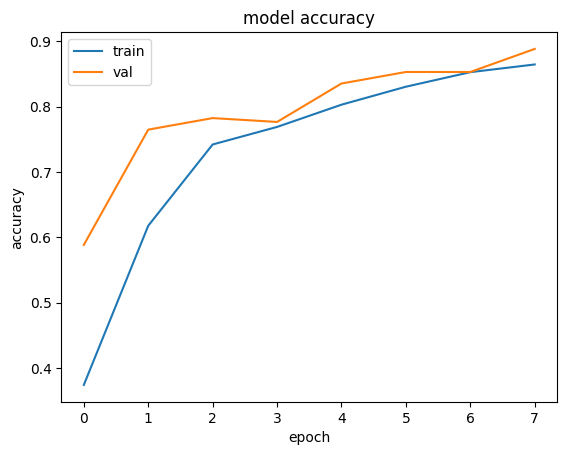

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()